In [55]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('data/obj_pose-laser-radar-synthetic-input.txt') as f:
    radar = [l for l in f.readlines() if l.startswith('R')]

In [3]:
import io 
buffer = io.StringIO()
for l in radar: 
    buffer.write(l + "\n")
buffer.seek(0)

headers = [
    'sensor_type', 'rho_measured',
    'phi_measured', 'rhodot_measured', 
    'timestamp', 'x_groundtruth', 
    'y_groundtruth', 'vx_groundtruth', 
    'vy_groundtruth', 'yaw_groundtruth', 'yawrate_groundtruth']

data = pd.read_csv(buffer, sep="\t", header=None)
data = data.rename(columns=lambda i: headers[int(i)])

In [4]:
data.head()

,sensor_type,rho_measured,phi_measured,rhodot_measured,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth
0,R,1.014892,0.554329,4.892807,1477010443050000,0.859997,0.600045,5.199747,0.001797,0.000346,0.013822
1,R,1.047505,0.389240,4.511325,1477010443150000,1.379955,0.600629,5.198979,0.010778,0.002073,0.027634
2,R,1.698300,0.298280,5.209986,1477010443250000,1.899823,0.602470,5.197661,0.026932,0.005182,0.041430
3,R,2.044382,0.276002,5.043867,1477010443350000,2.419540,0.606284,5.195728,0.050239,0.009669,0.055199
4,R,2.990916,0.217668,5.191807,1477010443450000,2.939043,0.612786,5.193090,0.080668,0.015532,0.068933


In [52]:
data['phi_ground'] = np.arctan2(data.y_groundtruth, data.x_groundtruth)

In [54]:
y = data['phi_measured'] - data['phi_ground']

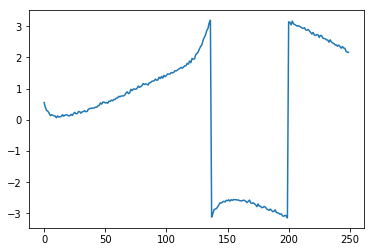

In [57]:
plt.plot(data.phi_measured)

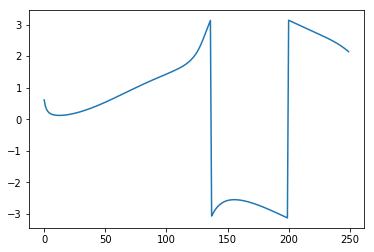

In [58]:
plt.plot(data.phi_ground)

In [74]:
x1, y1 = (-1, 0.1)
x2, y2 = (1, -0.2)

In [75]:
phi1 = math.atan2(y1, x1)
phi2 = math.atan2(y2, x2)

In [76]:
phi1

3.0419240010986313

In [77]:
phi2

-0.19739555984988078

In [79]:
phi1 - phi2 - 2 * math.pi

-3.043865746231074